In [586]:
import pandas as pd
import numpy as np

df = pd.read_csv("6class.csv")
initial_df = pd.read_csv("6class.csv")

## The purpose of making the dataset is to prove that the stars follows a certain graph in the celestial Space , specifically called Hertzsprung-Russell Diagram or simply HR-Diagram so that we can classify stars by plotting its features based on that graph.

·        Absolute Temperature (in K)

·        Relative Luminosity (L/Lo)

·        Relative Radius (R/Ro)

·        Absolute Magnitude (Mv)

·        Star Color (white,Red,Blue,Yellow,yellow-orange etc)

·        Spectral Class (O,B,A,F,G,K,,M)

·        Star Type **(Red Dwarf, Brown Dwarf, White Dwarf, Main Sequence , SuperGiants, HyperGiants)**

Lo = 3.828 x 10^26 Watts (Avg Luminosity of Sun)

Ro = 6.9551 x 10^8 m (Avg Radius of Sun)

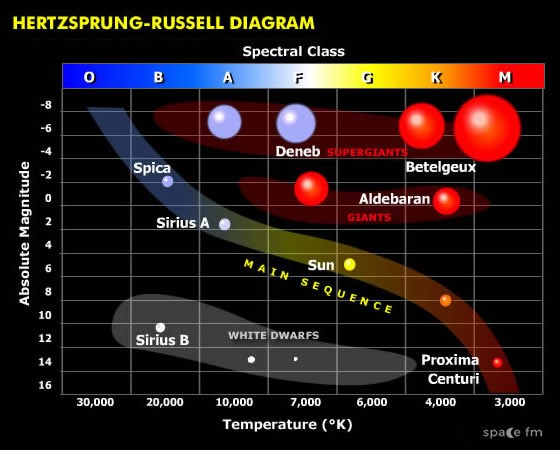

In [69]:
pd.set_option('display.max_rows', None)
df.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


# Exploratory Data Analysis(EDA)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    object 
 6   Spectral Class          240 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


In [66]:
df.shape

(240, 7)

In [250]:
# Переминуем столбцы
column_names = ["Temperature","Luminosity","Radius","Abs_magnitude","Star_type","Star_color","Spectral_Class"]
df.columns = column_names
df.columns

Index(['Temperature', 'Luminosity', 'Radius', 'Abs_magnitude', 'Star_type',
       'Star_color', 'Spectral_Class'],
      dtype='object')

In [251]:
print(initial_df.iloc[:,5].value_counts())
print("\nКоличество вариантов цветов:",len(initial_df.iloc[:,5].value_counts().index))
# Находим несколько повторяющихся значений 

Red                   112
Blue                   55
Blue-white             26
Blue White             10
yellow-white            8
White                   7
Blue white              3
Yellowish White         3
white                   3
Whitish                 2
Orange                  2
yellowish               2
Pale yellow orange      1
White-Yellow            1
Blue                    1
Yellowish               1
Orange-Red              1
Blue white              1
Blue-White              1
Name: Star color, dtype: int64

Количество вариантов цветов: 19


In [259]:
# Исправляем повторяющиеся цвета
df.replace(["Blue-White","Blue-white","Blue white","Blue White","Blue white "],"Blue-White",inplace=True)
df.replace(["white","White"],"White",inplace=True)
df.replace(["Blue","Blue "],"Blue",inplace=True)
df.replace(["yellowish","Yellowish"],"Yellowish",inplace=True)
print(df.iloc[:,5].value_counts(),"\n")
print("Исправленное кол-во цветов:",len(df.iloc[:,5].value_counts().index))

Red                   112
Blue                   56
Blue-White             41
White                  10
yellow-white            8
Yellowish White         3
Yellowish               3
Whitish                 2
Orange                  2
Pale yellow orange      1
White-Yellow            1
Orange-Red              1
Name: Star_color, dtype: int64 

Исправленное кол-во цветов: 12


In [54]:
# Количество значений каждого спектрального класса
df.iloc[:,6].value_counts()

M    111
B     46
O     40
A     19
F     17
K      6
G      1
Name: Spectral Class, dtype: int64

In [60]:
# Количество значений каждого типа звезд
df.iloc[:,4].value_counts()

0    40
1    40
2    40
3    40
4    40
5    40
Name: Star type, dtype: int64

In [162]:
# Проверим существуют ли пропущенные значения 
checkna = df.isna().any()
if checkna.any() == True:
    print("Есть пустые значения")
else:
    print("Пустых значений нет")

Пустых значений нет


In [260]:
# Количество значений каждого столбца
c = 0
for column in df: 
    print("Количество значений", df.columns[0+c], ":",len(df[column].value_counts()))
    c+=1

Количество значений Temperature : 228
Количество значений Luminosity : 208
Количество значений Radius : 216
Количество значений Abs_magnitude : 228
Количество значений Star_type : 6
Количество значений Star_color : 12
Количество значений Spectral_Class : 7


<AxesSubplot:>

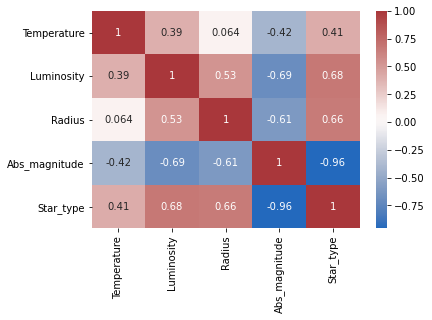

In [261]:
# Хитмап корреляции признаков 
import seaborn as sb
cor = df.corr()
sb.heatmap(cor, cmap="vlag", annot=True)

После построения хитмапа корреляции, возникла проблема, что не отображаются цвета звезд, так как это string признак 

Чтобы узнать можно ли еще уменьшить кол-во цветов, нужно найти корреляцию между похожими цветами

Это оказалась не так просто сделать, ведь опять же цвета это string

Дальше несколько методов, которые я пытался использовать. Возможно не совсем то что нужно, искал в интернете варианты

In [262]:
## ANOVA
#!pip install pingouin
import pingouin as pg
anova = pg.anova(dv="Temperature",between = 'Star_color', data = df,detailed=True)
anova

,Source,SS,DF,MS,F,p-unc,np2
0,Star_color,1.506044e+10,11,1.369131e+09,46.259699,6.175868e-52,0.690578
1,Within,6.748030e+09,228,2.959662e+07,NaN,NaN,NaN


Иницилизирую переменные цветов в качестве массивов с только выбранными цветами, чтобы дальше подставлять в функцию и сравнивать, например, с температурой

In [279]:
red = df.Star_color=="Red"
yellow1 = df.Star_color=='yellow-white'
yellow2 = df.Star_color=='Yellowish White'
yellow3 = df.Star_color=='White-Yellow'
yellow4 = df.Star_color=='Yellowish'


Нашел на towardsdatascience.com функцию, которая находит корреляцию между string и int значениями

In [280]:
def correlation_ratio(categories, measurements):
    fcat, _ = pd.factorize(categories)
    cat_num = np.max(fcat)+1
    y_avg_array = np.zeros(cat_num)
    n_array = np.zeros(cat_num)
    for i in range(0,cat_num):
        cat_measures = measurements[np.argwhere(fcat == i).flatten()]
        n_array[i] = len(cat_measures)
        y_avg_array[i] = np.average(cat_measures)
    y_total_avg = np.sum(np.multiply(y_avg_array,n_array))/np.sum(n_array)
    numerator = np.sum(np.multiply(n_array,np.power(np.subtract(y_avg_array,y_total_avg),2)))
    denominator = np.sum(np.power(np.subtract(measurements,y_total_avg),2))
    if numerator == 0:
        eta = 0.0
    else:
        eta = np.sqrt(numerator/denominator)
    return eta

print('yellow-white:',correlation_ratio(yellow1,df.Temperature))
print('Yellowish White:',correlation_ratio(yellow2,df.Temperature))
print('White-Yellow:',correlation_ratio(yellow3,df.Temperature))
print('Yellowish:',correlation_ratio(yellow4,df.Temperature))

yellow-white: 0.07852893817553493
Yellowish White: 0.0038854811811030753
White-Yellow: 0.02305413083520192
Yellowish: 0.07045940396292362


Получаем достаточно схожую корреляцию между yellow-white (0.0785) и Yellowish (0.0704)

У Yellowish White (0.0038) с White-Yellow (0.0231) в принципе тоже 

И тут возникает вопрос а стоит ли в одну категорию их объединять или нет?

Для начала не буду менять, оставлю как есть. Посмотрим score модели в конце. После построения модели, можно будет построить вторую модель уже с объединившимися цветами и проверить score и точность между моделями.

---------------------------------------------------------------
Далее присвою каждому цвету численное значение (категоризация), чтобы можно было построить хитмап корреляции этих признаков

In [290]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df.Star_color)
df['colorsEncoded'] = le.transform(df.Star_color)
le.classes_
df[15:30]

,Temperature,Luminosity,Radius,Abs_magnitude,Star_type,Star_color,Spectral_Class,colorsEncoded
15,3340,0.003800,0.24000,13.07,1,Red,M,5
16,2799,0.001800,0.16000,14.79,1,Red,M,5
17,3692,0.003670,0.47000,10.80,1,Red,M,5
18,3192,0.003620,0.19670,13.53,1,Red,M,5
19,3441,0.039000,0.35100,11.18,1,Red,M,5
20,25000,0.056000,0.00840,10.58,2,Blue-White,B,1
21,7740,0.000490,0.01234,14.02,2,White,A,6
22,7220,0.000170,0.01100,14.23,2,White,F,6
23,8500,0.000500,0.01000,14.50,2,White,A,6
24,16500,0.013000,0.01400,11.89,2,Blue-White,B,1


### Хитмап корреляции признаков с добавленным энкодингом цветов:

<AxesSubplot:>

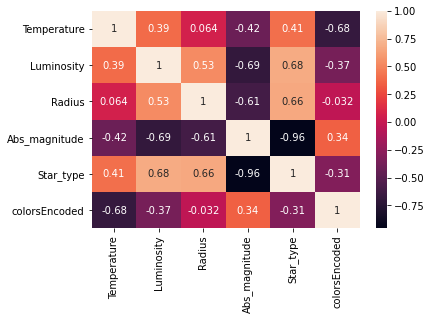

In [291]:
sb.heatmap(df.corr(),annot=True)

Видим достаточно сильную корреляцию между цветами и температурой звезд, что логично, но почему-то корреляция отрицательная 

### Фактор инфляции дисперсии

Проверяю признаки на мультиколлинеарность, но думаю здесь это не совсем логично, так что скорее проверяем насколько коррелированны признаки и видим, что они все достоточно сильно зависимы 

In [621]:
X["Spectral_class"] = df["Spectral Class"]
le.fit(X.Spectral_class)
X.Spectral_class = le.transform(X.Spectral_class)
X.head()

,Temperature,Luminosity,Radius,Abs_magnitude,colorsEncoded,Star_type,Predicted_class,Spectral_class
0,3068,0.002400,0.1700,16.12,5,0,0,5
1,3042,0.000500,0.1542,16.60,5,0,0,5
2,2600,0.000300,0.1020,18.70,5,0,0,5
3,2800,0.000200,0.1600,16.65,5,0,0,5
4,1939,0.000138,0.1030,20.06,5,0,0,5


In [624]:
X = lrdf.copy()
#X["Spectral_class"] = df["Spectral Class"]
#X.drop(labels="Spectral_class", axis=1)
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
for i in range(len(X.columns))]

print(vif_data)

           feature          VIF
0      Temperature     4.400509
1       Luminosity     3.406795
2           Radius     2.447672
3    Abs_magnitude     3.983737
4    colorsEncoded     4.611640
5        Star_type  2230.046944
6  Predicted_class  2223.001009
7   Spectral_class     4.046952


Видно, что самую сильную зависимость имеют значения температуры с цветами звезд.

Спектральный класс тоже имеет близкое значение VIF с температурой и цветом звезды, так что возможно далее я опущу этот признак, ведь это должно повысить оценку модели (опустить фичу)

Кстати, еще с таблицы выше можно получить еще одну оценку модели Логистической регрессии (модель представлена дальше). Фичи тип звезды и предугаданный тип звезды имеют относительно близкие значения VIF 2230 и 2223 соответственно 

Это я делал к тому, чтобы далее проверить цвета на мультиколлинеарность, чтобы выявить повторяющиеся цвета, но к сожалению этого сделать не получилось

In [583]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df.Star_color
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.value_counts().index

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
for i in range(X.shape[1])]

print(vif_data)


IndexError: tuple index out of range

## Визуализация данных

/opt/conda/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


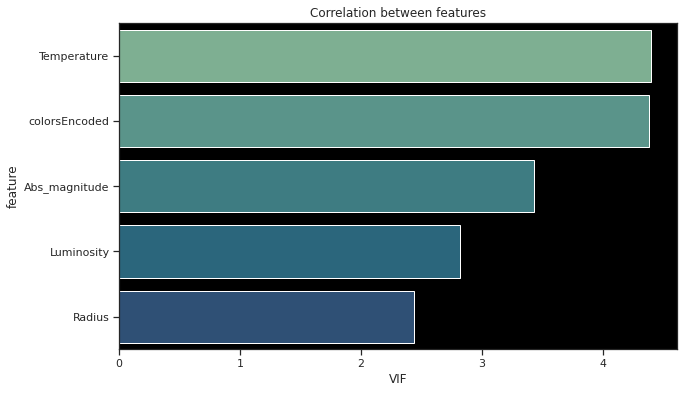

In [581]:
barx = vif_data.iloc[:5]
barx.sort_values("VIF",ascending=False,inplace=True)
sb.barplot(x='VIF',y='feature',data=barx,palette='crest').set_title("Correlation between features")
plt.show()

/opt/conda/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 56.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 23.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 40.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/tmp/ipykernel_1413/2304029385.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  swarm.set_yticklabels(['0','Red Dwarf', 'Brown Dwarf', 'White Dwarf', 'Main Sequence' , 'SuperGiants', 'HyperGiants'])


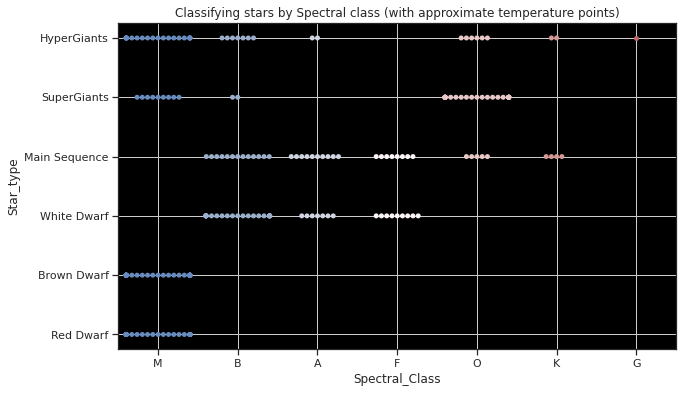

In [566]:
sb.set()
sb.set(style="ticks",rc = {'axes.facecolor': 'black'})
swarm = sb.swarmplot(data=df, x="Spectral_Class", y="Star_type",palette='vlag')
plt.grid()
swarm.set_yticklabels(['0','Red Dwarf', 'Brown Dwarf', 'White Dwarf', 'Main Sequence' , 'SuperGiants', 'HyperGiants'])
plt.title("Classifying stars by Spectral class (with approximate temperature points)")
plt.show()

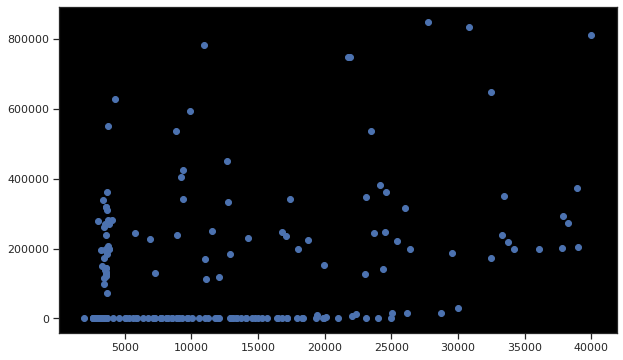

In [823]:
plt.scatter(df['Temperature (K)'],df['Luminosity(L/Lo)'])

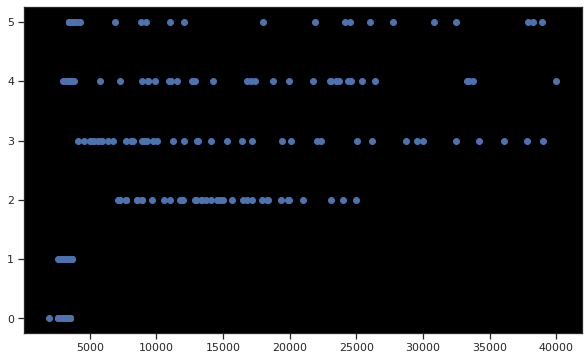

In [834]:
plt.scatter(df['Temperature (K)'],df['Star type'],cmap='vlag')

# Классификация звезд

### Логистическая регрессия

Дропнул столбы 'Star_color' и 'Spectral_Class', так как они имеют тип данных string, что регрессия не может обрабатывать. Для цветов звезд у меня уже есть энкодированный столбец 'colorsEncoded', а вот фичу спектрального класса мы теряем.

Для дальнейшего удобства переставил стобцы так, чтобы тип звезд был последним столбом, ведь он нам не нужен для предикатов регрессии.

In [380]:
lrdf = df.copy()
lrdf.drop(columns = ['Star_color','Spectral_Class'])
column_names = ['Temperature','Luminosity','Radius','Abs_magnitude','colorsEncoded','Star_type']
lrdf = lrdf.reindex(columns=column_names)
lrdf.head()

,Temperature,Luminosity,Radius,Abs_magnitude,colorsEncoded,Star_type
0,3068,0.002400,0.1700,16.12,5,0
1,3042,0.000500,0.1542,16.60,5,0
2,2600,0.000300,0.1020,18.70,5,0
3,2800,0.000200,0.1600,16.65,5,0
4,1939,0.000138,0.1030,20.06,5,0


С дефолтным solver 'lbfgs' изначально получил score ≈ 0.5845. Изменил solver на 'newton-cg' и получил score 0.9958

In [701]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

y = lrdf.iloc[:,5]
X = lrdf.iloc[:,:5]

LR = LogisticRegression(random_state=0, solver='newton-cg', multi_class='multinomial').fit(X, y)
LR.predict(X.iloc[55:70,:])

lrdf['Predicted_class'] = LR.predict(X.iloc[:,:])

round(LR.score(X,y), 4)

#xarray = np.arange(240)
#print(xarray)
#plt.plot(xarray,y)

/opt/conda/lib/python3.9/site-packages/sklearn/utils/optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "


0.9958

Строю новый датафрейм с новым столбцом предсказанного класса нашей логистической регрессией 

In [389]:
lrdf.head(10)

,Temperature,Luminosity,Radius,Abs_magnitude,colorsEncoded,Star_type,Predicted_class
0,3068,0.002400,0.1700,16.12,5,0,0
1,3042,0.000500,0.1542,16.60,5,0,0
2,2600,0.000300,0.1020,18.70,5,0,0
3,2800,0.000200,0.1600,16.65,5,0,0
4,1939,0.000138,0.1030,20.06,5,0,0
5,2840,0.000650,0.1100,16.98,5,0,0
6,2637,0.000730,0.1270,17.22,5,0,0
7,2600,0.000400,0.0960,17.40,5,0,0
8,2650,0.000690,0.1100,17.45,5,0,0
9,2700,0.000180,0.1300,16.05,5,0,0


Для удобства создаю еще один датафрейм только с изначальными классами звезд и прогнозируемыми классами 

In [580]:
lrdf2 = lrdf.copy()
lrdf2['Star_type'] = lrdf2['Star_type'].replace([0,1,2,3,4,5],['Red Dwarf', 'Brown Dwarf', 'White Dwarf', 'Main Sequence' , 'SuperGiants', 'HyperGiants'])
lrdf2['Predicted_class'] = lrdf2['Predicted_class'].replace([0,1,2,3,4,5],['Red Dwarf', 'Brown Dwarf', 'White Dwarf', 'Main Sequence' , 'SuperGiants', 'HyperGiants'])
lrdf2 = lrdf2.select_dtypes(object)
lrdf2.columns = ['Real star type','Predicted star type']
lrdf2

,Real star type,Predicted star type
0,Red Dwarf,Red Dwarf
1,Red Dwarf,Red Dwarf
2,Red Dwarf,Red Dwarf
3,Red Dwarf,Red Dwarf
4,Red Dwarf,Red Dwarf
5,Red Dwarf,Red Dwarf
6,Red Dwarf,Red Dwarf
7,Red Dwarf,Red Dwarf
8,Red Dwarf,Red Dwarf
9,Red Dwarf,Red Dwarf


### TT split / CV using KNN

In [594]:
#from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

Поделим датафрейм на тест и трейн выборки

Дропаем ненужные стобцы - Predicted_class (так как это с предыдущей модели) и Star_type (наше прогнозируемое значение)

In [737]:
kndf = lrdf.copy()
kndf.drop(labels="Predicted_class", axis=1,inplace=True)
X = kndf.drop(labels="Star_type", axis=1,inplace=False)
y = kndf['Star_type']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


Проверим точность модели при k=5  

In [738]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
metrics.accuracy_score(y_test,y_pred)

0.65

Проведем кросс валидацию, при k соседей = 5 и cv = 10 (фолды)

In [640]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print(scores)
scores.mean()

[0.625      0.58333333 0.66666667 0.66666667 0.70833333 0.58333333
 0.70833333 0.75       0.58333333 0.58333333]


0.6458333333333333

In [644]:
k_range = range(1,30)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

[0.7291666666666667, 0.6166666666666666, 0.6875000000000001, 0.625, 0.6458333333333333, 0.5958333333333334, 0.6333333333333334, 0.6000000000000001, 0.5958333333333332, 0.5958333333333333, 0.6166666666666666, 0.5999999999999999, 0.5791666666666667, 0.5625, 0.5583333333333333, 0.5583333333333333, 0.5499999999999999, 0.5416666666666666, 0.5499999999999999, 0.5458333333333333, 0.55, 0.5499999999999999, 0.5541666666666667, 0.5333333333333334, 0.5416666666666667, 0.5416666666666666, 0.5541666666666667, 0.55, 0.5416666666666666]


Text(0, 0.5, 'Точность модели')

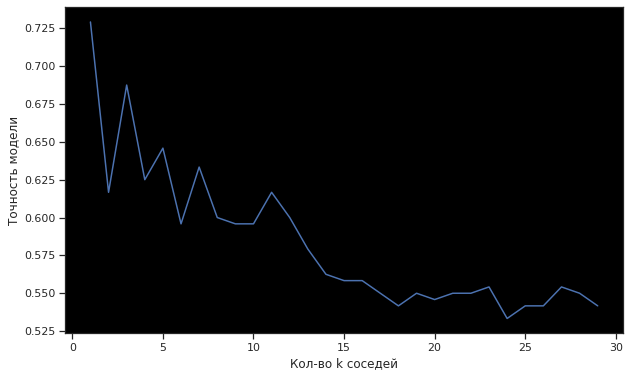

In [646]:
plt.plot(k_range,k_scores)
plt.xlabel("Кол-во k соседей")
plt.ylabel("Точность модели")

С графика выше, можно сделать вывод, что наилучшее k = 1. Думаю это не типичная ситуация. При таком низком значении k, можно получить высокую дисперсию в данных, что в свою очередь может привести к переобучению модели (модель может хорошо работать только на конретной выборке train/test)

In [802]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
metrics.accuracy_score(y_test,y_pred)

0.7166666666666667

Получил неплохую оценку модели KNN ≈ 0.72

Дальше построю таблицу для наглядности, где сравниваю реальный класс звезды и прогнозируемым классом.
Пришлось транспонировать датафрейм

Только заметил, что у функции train_test_split параметр shuffle по дефолту стоит true, так что выборка вся перемешалась

In [697]:
check_test_results = pd.DataFrame(data=[y_test.values,y_pred])
check_test_results = check_test_results.transpose()
check_test_results.columns = ['Real class','Predicted']
check_test_results.replace([0,1,2,3,4,5],['Red Dwarf', 'Brown Dwarf', 'White Dwarf', 'Main Sequence' , 'SuperGiants', 'HyperGiants'],inplace=True)
check_test_results.head(10)

,Real class,Predicted
0,White Dwarf,White Dwarf
1,Red Dwarf,Red Dwarf
2,Main Sequence,Main Sequence
3,SuperGiants,SuperGiants
4,SuperGiants,HyperGiants
5,HyperGiants,HyperGiants
6,HyperGiants,HyperGiants
7,White Dwarf,White Dwarf
8,Red Dwarf,Red Dwarf
9,White Dwarf,White Dwarf


Проведу кросс валидацию на Логистической регрессии, построенной выше

Получаю подозрительно хорошую оценку, может быть модель переобучилась?

In [707]:
scores2 = cross_val_score(LR, X_train,y_train, cv=10, scoring='accuracy')
print(scores2)
scores2.mean()

/opt/conda/lib/python3.9/site-packages/sklearn/utils/optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "
/opt/conda/lib/python3.9/site-packages/sklearn/utils/optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "
/opt/conda/lib/python3.9/site-packages/sklearn/utils/optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "
/opt/conda/lib/python3.9/site-packages/sklearn/utils/optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "
/opt/conda/lib/python3.9/site-packages/sklearn/utils/optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the

[1.         1.         1.         1.         1.         1.
 1.         0.94444444 1.         0.88888889]


/opt/conda/lib/python3.9/site-packages/sklearn/utils/optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "


0.9833333333333334

In [811]:
scores4 = cross_val_score(LR, X_train,y_train, cv=10, scoring='recall')
print(scores4)
#scores4.mean()

/opt/conda/lib/python3.9/site-packages/sklearn/utils/optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py", line 63, in in

[nan nan nan nan nan nan nan nan nan nan]


/opt/conda/lib/python3.9/site-packages/sklearn/utils/optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py", line 63, in in

In [743]:
scores3 = cross_val_score(LR, X_train,y_train, cv=10, scoring='neg_mean_squared_error')
print(-scores3)
-scores3.mean()

/opt/conda/lib/python3.9/site-packages/sklearn/utils/optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "
/opt/conda/lib/python3.9/site-packages/sklearn/utils/optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "
/opt/conda/lib/python3.9/site-packages/sklearn/utils/optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "
/opt/conda/lib/python3.9/site-packages/sklearn/utils/optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "
/opt/conda/lib/python3.9/site-packages/sklearn/utils/optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the

[0.         0.         0.         0.         0.         0.
 0.         0.05555556 0.         0.11111111]


/opt/conda/lib/python3.9/site-packages/sklearn/utils/optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "


0.016666666666666666

In [818]:
LR2 = LogisticRegression(random_state=0, solver='newton-cg', multi_class='multinomial').fit(X_train,y_train)
y_pred_lr2 = LR2.predict(X_test)
metrics.accuracy_score(y_test,y_pred_lr2)

/opt/conda/lib/python3.9/site-packages/sklearn/utils/optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "


0.9666666666666667

### SVM + cross validation

In [723]:
from sklearn import svm

#‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’
SVM = svm.SVC(decision_function_shape="ovr",kernel="linear").fit(X_train, y_train)
SVM.predict(X_test)
SVM.score(X_test, y_test)

scores2 = cross_val_score(SVM, X_train,y_train, cv=10, scoring='accuracy')
print(scores2)
scores2.mean()

0.9833333333333333
[1.         1.         1.         1.         1.         1.
 1.         1.         1.         0.88888889]


0.9888888888888889

### Random forest + cross validation

In [725]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0).fit(X_train, y_train)
RF.predict(X_test)
RF.score(X_test, y_test)

scores2 = cross_val_score(RF, X_train,y_train, cv=10, scoring='accuracy')
print(scores2)
scores2.mean()

[1.         1.         1.         1.         1.         1.
 1.         1.         1.         0.94444444]


0.9944444444444445

### Decision Tree Classifier с критерием индекса gini

In [760]:
from sklearn.tree import DecisionTreeClassifier

clf_gini = DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=0)
clf_gini.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [764]:
from sklearn.metrics import accuracy_score

y_pred_gini = clf_gini.predict(X_test)
print("Точность модели на тестовых данных:",accuracy_score(y_test,y_pred_gini))

Точность модели на тестовых данных: 0.6166666666666667


In [765]:
y_pred_train_gini = clf_gini.predict(X_train)
print("Точность модели на тренировочных данных:",accuracy_score(y_train,y_pred_train_gini))

Точность модели на тренировочных данных: 0.6833333333333333


Точность модели на тестовых и тренировочных данных достаточно схожа, поэтому можем сказать, что проблем с переобучением или недообучением не должно быть.

## Naive Bayes classifier

In [815]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB().fit(X_train, y_train)
gnb_predictions = gnb.predict(X_test)
 
accuracy = gnb.score(X_test, y_test)
print(accuracy)


0.8333333333333334


# Classification report

Строю classification report для каждой модели

В качестве оценки, решил взять recall, так как она показывает насколько хорошо модель обнаруживает классы

Можно рассмотреть и precision, чтобы оценить насколько хорошо модель отличает классы между собой

In [809]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_gini))
print(classification_report(y_train,y_pred_train_gini))
print("Recall Score for Decision Tree  : ",recall_score(y_test,y_pred_gini, pos_label='positive',average='micro'))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.00      0.00      0.00        11
           2       1.00      1.00      1.00         9
           3       0.45      1.00      0.62         9
           4       0.43      1.00      0.60         9
           5       0.00      0.00      0.00        12

    accuracy                           0.62        60
   macro avg       0.48      0.67      0.54        60
weighted avg       0.45      0.62      0.50        60

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       0.00      0.00      0.00        29
           2       1.00      1.00      1.00        31
           3       0.52      1.00      0.68        31
           4       0.53      1.00      0.69        31
           5       0.00      0.00      0.00        28

    accuracy                           0.68       180
   macro avg       0.51

/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classificat

In [808]:
from sklearn.metrics import recall_score

print("KNN\n",classification_report(y_test,y_pred))
print("Recall Score for KNN : ",recall_score(y_test, y_pred, pos_label='positive',average='micro'))

KNN
               precision    recall  f1-score   support

           0       0.62      0.80      0.70        10
           1       0.75      0.55      0.63        11
           2       1.00      1.00      1.00         9
           3       1.00      0.89      0.94         9
           4       0.46      0.67      0.55         9
           5       0.67      0.50      0.57        12

    accuracy                           0.72        60
   macro avg       0.75      0.73      0.73        60
weighted avg       0.74      0.72      0.72        60

Recall Score for KNN :  0.7166666666666667


/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1298: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


In [807]:
y_pred_svm = SVM.predict(X_test)
print("SVM\n",classification_report(y_test,y_pred_svm))
print("Recall Score for SVM : ",recall_score(y_test, y_pred_svm, pos_label='positive',average='micro'))

SVM
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00         9
           3       1.00      0.89      0.94         9
           4       0.90      1.00      0.95         9
           5       1.00      1.00      1.00        12

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60

Recall Score for SVM :  0.9833333333333333


/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1298: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


In [816]:
y_pred_rf = RF.predict(X_test)
print("Random forest\n",classification_report(y_test,y_pred_rf))
print("Recall Score for Random forest : ",recall_score(y_test, y_pred_rf, pos_label='positive',average='micro'))

Random forest
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00         9
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00         9
           5       1.00      1.00      1.00        12

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60

Recall Score for Random forest :  1.0


/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1298: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


In [819]:
print("Logistic regression\n",classification_report(y_test,y_pred_lr2))
print("Recall Score for Logistic regression : ",recall_score(y_test, y_pred_lr2, pos_label='positive',average='micro'))

Logistic regression
               precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       1.00      0.91      0.95        11
           2       1.00      1.00      1.00         9
           3       1.00      0.89      0.94         9
           4       0.90      1.00      0.95         9
           5       1.00      1.00      1.00        12

    accuracy                           0.97        60
   macro avg       0.97      0.97      0.97        60
weighted avg       0.97      0.97      0.97        60

Recall Score for Logistic regression :  0.9666666666666667


/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1298: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


### Лучшую оценку recall получили в моделе Random forest. Возможно все оценки этой модели слишком хорошие и модель переобучилась.

### SVM тоже получил хорошие оценки

# Матрицы ошибок

In [734]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,knn.predict(X_test))

array([[8, 2, 0, 0, 0, 0],
       [5, 6, 0, 0, 0, 0],
       [0, 0, 9, 0, 0, 0],
       [0, 0, 0, 8, 1, 0],
       [0, 0, 0, 0, 6, 3],
       [0, 0, 0, 0, 6, 6]])

In [735]:
confusion_matrix(y_test,SVM.predict(X_test))

array([[10,  0,  0,  0,  0,  0],
       [ 0, 11,  0,  0,  0,  0],
       [ 0,  0,  9,  0,  0,  0],
       [ 0,  0,  0,  8,  1,  0],
       [ 0,  0,  0,  0,  9,  0],
       [ 0,  0,  0,  0,  0, 12]])

In [736]:
confusion_matrix(y_test,RF.predict(X_test))

array([[10,  0,  0,  0,  0,  0],
       [ 0, 11,  0,  0,  0,  0],
       [ 0,  0,  9,  0,  0,  0],
       [ 0,  0,  0,  9,  0,  0],
       [ 0,  0,  0,  0,  9,  0],
       [ 0,  0,  0,  0,  0, 12]])

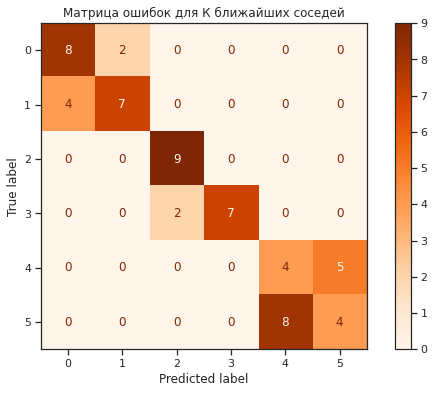

In [784]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn, X_test, y_test,cmap="Oranges")
plt.title("Матрица ошибок для К ближайших соседей")
plt.show()

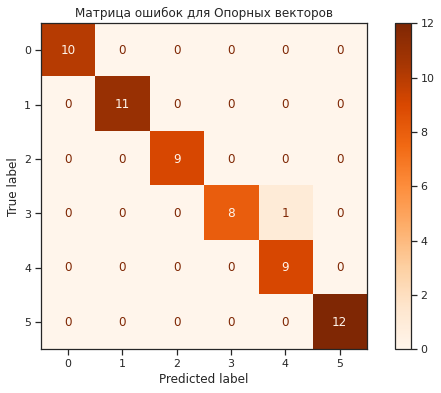

In [758]:
plot_confusion_matrix(SVM, X_test, y_test,cmap="Oranges")
plt.title("Матрица ошибок для Опорных векторов")
plt.show()

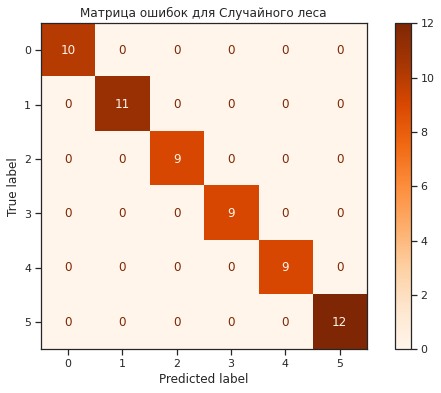

In [757]:
plot_confusion_matrix(RF, X_test, y_test,cmap="Oranges")
plt.title("Матрица ошибок для Случайного леса")
plt.show()